### Install libraries

In [21]:
library(ggplot2)
library(plyr)
library(readxl)
library(car)

Loading required package: carData


### Load and read dataset from local disk 
https://www.kaggle.com/itsmesunil/bank-loan-modelling

The data is in .xlsx format and in first tab data discription is there and in the second tab data is there. So while reading the dataset we are using "2L" keyword.

In [47]:
bank_loan_data <- read_excel('datasets/Bank_Personal_Loan_Modelling.xlsx', 2L)

head(bank_loan_data, 5)

ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Check empty cell in datasets or not

In [48]:
colSums(is.na(bank_loan_data))

ID               Age        Experience            Income 
                0                 0                 0                 0 
          ZIPCode            Family             CCAvg         Education 
                0                 0                 0                 0 
         Mortgage      PersonalLoan SecuritiesAccount         CDAccount 
                0                 0                 0                 0 
           Online        CreditCard 
                0                 0

In [49]:
dim(bank_loan_data)

[1] 5000   14

In [50]:
colnames(bank_loan_data)

[1] "ID"                "Age"               "Experience"       
 [4] "Income"            "ZIPCode"           "Family"           
 [7] "CCAvg"             "Education"         "Mortgage"         
[10] "PersonalLoan"      "SecuritiesAccount" "CDAccount"        
[13] "Online"            "CreditCard"

#### Checking unique values

In [51]:
table(bank_loan_data$CreditCard)


   0    1 
3530 1470 

In [52]:
table(bank_loan_data$Family)


   1    2    3    4 
1472 1296 1010 1222 

##### Education labels
* 1: Undergrad
* 2: Graduate 
* 3: Advanced/Professional

In [53]:
table(bank_loan_data$Education)


   1    2    3 
2096 1403 1501 

In [54]:
table(bank_loan_data$PersonalLoan)


   0    1 
4520  480 

In [91]:
table(bank_loan_data$Online)


   0    1 
2016 2984 

### Barplot 

### Set the width and height of the plot

This will set the width and height for all the plots in this notebook

In [55]:
options(repr.plot.width = 6, repr.plot.height = 4)

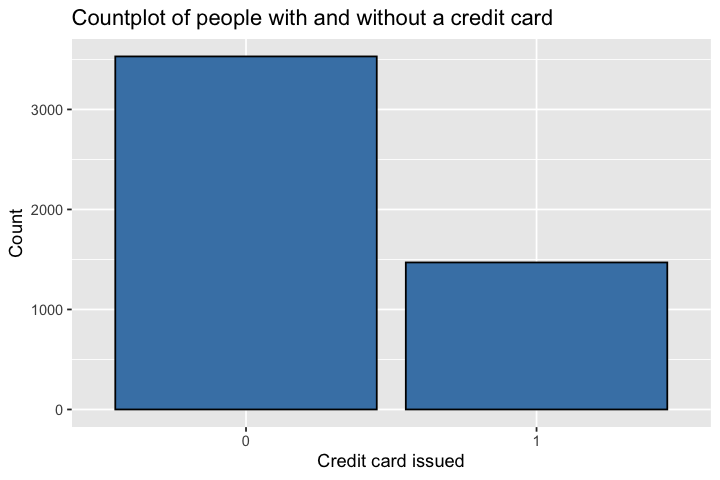

In [56]:
ggplot(data = bank_loan_data, 
       aes(factor(x = CreditCard))) + 
       geom_bar(col = 'black', fill = 'steelblue') +
       ggtitle('Countplot of people with and without a credit card')+
       xlab('Credit card issued') +
       ylab('Count')

### Box plot by grouping by credit card 
https://nceas.github.io/oss-lessons/dataviz-and-interactive-tools/module-1-ggplot2.html

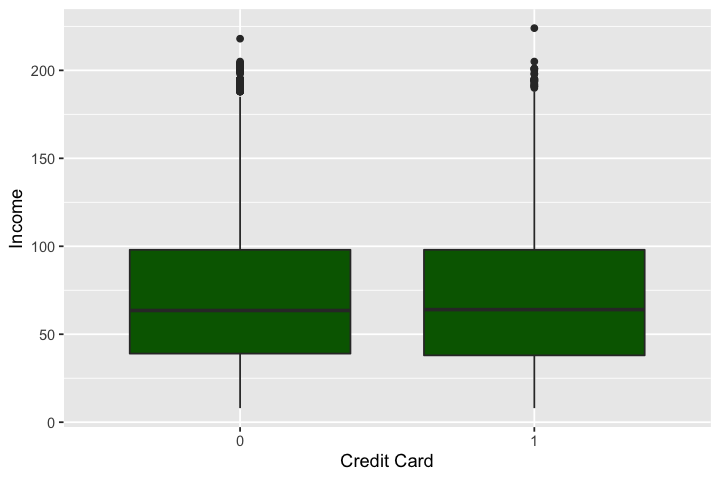

In [57]:
qplot(factor(x = CreditCard), 
      y = Income,
      geom = 'boxplot', 
      data = bank_loan_data,
      xlab = 'Credit Card',
      ylab = 'Income',
      fill = I('darkgreen'))

### Calculate group size, income mean, and standard deviation according to credit card
https://en.wikipedia.org/wiki/Standard_error

In [58]:
ddply(bank_loan_data, ~factor(CreditCard), summarize,
      group_size = length(Income),
      income_mean = mean(Income),
      std_income = sd(Income),
      st_error_mean_income = std_income / sqrt(group_size))

factor(CreditCard),group_size,income_mean,std_income,st_error_mean_income
0,3530,73.84504,46.00000,0.7742309
1,1470,73.60408,46.12985,1.2031599


In [116]:
shapiro.test(bank_loan_data$Income)


	Shapiro-Wilk normality test

data:  bank_loan_data$Income
W = 0.92824, p-value < 2.2e-16


In [117]:
leveneTest(Income ~factor(CreditCard), data = bank_loan_data)

,Df,F value,Pr(>F)
group,1,0.1770581,0.6739318
,4998,NA,NA


### What is  t-test

A t-test is used to test the difference between two population means. 

https://stattrek.com/statistics/dictionary.aspx?definition=one-sample%20t-test

https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/t-test/

https://www.andrew.cmu.edu/user/achoulde/94842/lectures/lecture07/lecture07-94842.html

In [60]:
with(bank_loan_data, t.test(x = bank_loan_data$Income[CreditCard == 0],
                            y = bank_loan_data$Income[CreditCard == 1]))


	Welch Two Sample t-test

data:  bank_loan_data$Income[CreditCard == 0] and bank_loan_data$Income[CreditCard == 1]
t = 0.16842, df = 2741.8, p-value = 0.8663
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.564484  3.046405
sample estimates:
mean of x mean of y 
 73.84504  73.60408 


In [61]:
income_ttest <- t.test(Income ~ factor(CreditCard), data = bank_loan_data)

income_ttest


	Welch Two Sample t-test

data:  Income by factor(CreditCard)
t = 0.16842, df = 2741.8, p-value = 0.8663
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.564484  3.046405
sample estimates:
mean in group 0 mean in group 1 
       73.84504        73.60408 


### Note:- 
__`t.test` function return a lot of information and we can know by giving below function and can access by element wise.__

In [31]:
names(income_ttest)

[1] "statistic"   "parameter"   "p.value"     "conf.int"    "estimate"   
 [6] "null.value"  "stderr"      "alternative" "method"      "data.name"

### method

In [32]:
income_ttest$method

[1] "Welch Two Sample t-test"

### data

In [33]:
income_ttest$data.name

[1] "Income by factor(CreditCard)"

### t-test

In [34]:
income_ttest$statistic

t 
0.1684165

### p-value

In [35]:
income_ttest$p.value

[1] 0.866268

### Quantile-Quantile(Q-Q) Plot
The Q-Q plot, or quantile-quantile plot, is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption. It’s just a visual check, not an air-tight proof, so it is somewhat subjective. But it allows us to see at-a-glance if our assumption is plausible, and if not, how the assumption is violated and what data points contribute to the violation.


https://www.itl.nist.gov/div898/handbook/eda/section3/qqplot.htm

https://data.library.virginia.edu/understanding-q-q-plots/

https://www.andrew.cmu.edu/user/achoulde/94842/lectures/lecture07/lecture07-94842.html#qq-plot

### Q-Q Plot for `Income`

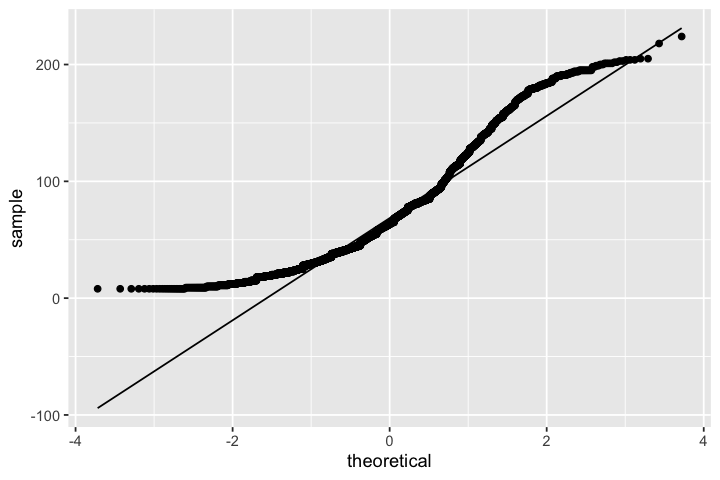

In [40]:
qq_plot <- ggplot(data = bank_loan_data, aes(sample = bank_loan_data$Income))

qq_plot + stat_qq() + stat_qq_line()

### Q-Q plot sample wise(`Method-I`)

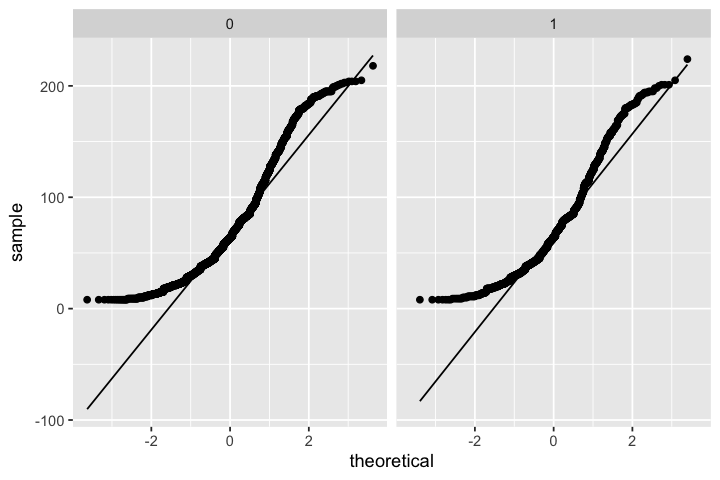

In [41]:
qq_plot + stat_qq() + stat_qq_line() + facet_grid(. ~ CreditCard)

### Note:-

https://www.andrew.cmu.edu/user/achoulde/94842/lectures/lecture07/lecture07-94842.html#what-if-sample-is-small-and-data-are-non-gaussian

https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test

In [67]:
wilcox_test <- wilcox.test(bank_loan_data$Income ~ factor(bank_loan_data$CreditCard), conf.int = T)
wilcox_test


	Wilcoxon rank sum test with continuity correction

data:  bank_loan_data$Income by factor(bank_loan_data$CreditCard)
W = 2605671, p-value = 0.811
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -1.999992  2.999955
sample estimates:
difference in location 
          3.144437e-05 


### Kruskal test

https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance

https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test

https://stats.stackexchange.com/questions/302464/wilcoxon-signed-rank-vs-kruskal-wallis

In [99]:
kruskal.test(bank_loan_data$Income ~ factor(bank_loan_data$CreditCard), data = bank_loan_data)


	Kruskal-Wallis rank sum test

data:  bank_loan_data$Income by factor(bank_loan_data$CreditCard)
Kruskal-Wallis chi-squared = 0.057196, df = 1, p-value = 0.811


## Type-I error and Type-II error

http://www.sethspielman.org/courses/geog5023/r_examples/Type_I_and_II_Errors.html

In [69]:
credit_card_uses <- with(bank_loan_data, bank_loan_data$Income[CreditCard == 1])

credit_card_not_uses <- with(bank_loan_data, bank_loan_data$Income[CreditCard == 0])

In [70]:
summary(credit_card_uses)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    8.0    38.0    64.0    73.6    98.0   224.0 

In [71]:
summary(credit_card_not_uses)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.00   39.00   63.50   73.85   98.00  218.00 

## Type-1 error

In [74]:
num_test <- 1000
alpha_taken <- c(0.001, 0.01, 0.05, 0.1, 0.2)

tested_df <- data.frame(error = NA, p_value = NA, alpha = NA)

counter <- 1

for (i in 1:num_test){
    for (alpha in alpha_taken){
        
        sample_01 <- sample(credit_card_uses, 200)
        sample_02 <- sample(credit_card_not_uses, 200)
        
        t_test <- t.test(sample_01, sample_02)
        
        if (t_test$p.value < alpha){
            tested_df[counter, 1] <- 1
            tested_df[counter, 2] <- t_test$p.value
            tested_df[counter, 3] <- alpha
        } else {
            tested_df[counter, 1] <- 0
            tested_df[counter, 2] <- t_test$p.value
            tested_df[counter, 3] <- alpha
        }
        
        counter <- counter + 1
    }
}

### See, first ten records of `p.value` on different - different values of `alpha` and detect flag error, 

In [75]:
head(tested_df, 10)

error,p_value,alpha
0,0.6072814,0.001
0,0.4864692,0.010
0,0.3448589,0.050
0,0.8276171,0.100
0,0.2803239,0.200
0,0.8181079,0.001
0,0.1956456,0.010
0,0.9693631,0.050
0,0.5193874,0.100
0,0.2058988,0.200


### Calculate  type-1 error(`error`) on different - different values of alpha

In [76]:
aggregate(tested_df$error ~ tested_df$alpha, FUN = sum)

tested_df$alpha,tested_df$error
0.001,2
0.010,11
0.050,44
0.100,89
0.200,165


#### As we increase alpha value the number of false positives increases.

## Type-2 error

In [110]:
income_ttest <- t.test(Income ~ factor(PersonalLoan), data = bank_loan_data)

income_ttest


	Welch Two Sample t-test

data:  Income by factor(PersonalLoan)
t = -50.233, df = 659.49, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -81.57726 -75.43963
sample estimates:
mean in group 0 mean in group 1 
       66.23739       144.74583 


In [111]:
income_ttest$p.value

[1] 1.330735e-227

In [112]:
personal_loan_has <- with(bank_loan_data, bank_loan_data$Income[PersonalLoan == 1])

personal_loan_not_has <- with(bank_loan_data, bank_loan_data$Income[PersonalLoan == 0])

In [113]:
num_test <- 1000
alpha_taken <- c(0.001, 0.01, 0.05, 0.1, 0.2)

tested_df <- data.frame(error = NA, p_value = NA, alpha = NA)

counter <- 1

for (i in 1:num_test){
    for (alpha in alpha_taken){
        
        sample_01 <- sample(personal_loan_has, 200)
        sample_02 <- sample(personal_loan_not_has, 200)
        
        t_test <- t.test(sample_01, sample_02)
        
        if (t_test$p.value > alpha){
            tested_df[counter, 1] <- 1
            tested_df[counter, 2] <- t_test$p.value
            tested_df[counter, 3] <- alpha
        } else {
            tested_df[counter, 1] <- 0
            tested_df[counter, 2] <- t_test$p.value
            tested_df[counter, 3] <- alpha
        }
        
        counter <- counter + 1
    }
}


### See, first ten records of `p.value` on different - different values of `alpha` and detect flag error, 

In [114]:
head(tested_df, 10)

error,p_value,alpha
0,8.248632e-78,0.001
0,1.363151e-66,0.010
0,9.762872e-67,0.050
0,6.876145e-65,0.100
0,3.955433e-65,0.200
0,2.277351e-63,0.001
0,7.996761e-54,0.010
0,2.303791e-68,0.050
0,3.064832e-67,0.100
0,1.137655e-49,0.200


### Calculate  type-2 error(`error`) on different - different values of alpha

In [115]:
aggregate(tested_df$error ~ tested_df$alpha, FUN=sum)

tested_df$alpha,tested_df$error
0.001,0
0.010,0
0.050,0
0.100,0
0.200,0
